In [1]:
import numpy as np

In [2]:
sigma = np.loadtxt('S_diag.txt')
U = np.loadtxt('U_rows.txt')
V = np.loadtxt('VT_cols.txt')

**Hacemos las predicciones con distintas k's y escogemos la de menor error con respecto a la matriz de prueba**

In [6]:
test_data_matrix=np.loadtxt('test_data_matrix.txt')

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [34]:
k=[] 
rms=[]
for i in range(10,500, 10):
    pred = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    pred=pred.transpose()
    a=rmse(np.array(pred), test_data_matrix)
    k=np.append(i,k)
    rms=np.append(a,rms)
print(k,rms)

[ 490.  480.  470.  460.  450.  440.  430.  420.  410.  400.  390.  380.
  370.  360.  350.  340.  330.  320.  310.  300.  290.  280.  270.  260.
  250.  240.  230.  220.  210.  200.  190.  180.  170.  160.  150.  140.
  130.  120.  110.  100.   90.   80.   70.   60.   50.   40.   30.   20.
   10.] [ 3.61565665  3.61551233  3.61487703  3.61491751  3.6141398   3.61314276
  3.6117752   3.61094615  3.61047053  3.60975334  3.6094707   3.60885459
  3.60916425  3.60863378  3.60851209  3.60703111  3.60635956  3.60603373
  3.60472023  3.60393477  3.60285543  3.6022686   3.60212849  3.60085126
  3.59903612  3.59905214  3.60006686  3.59879376  3.59890892  3.59707748
  3.59645314  3.5938931   3.59169492  3.58998386  3.58684807  3.5863386
  3.58424966  3.58346911  3.58068764  3.57780429  3.57524507  3.57336837
  3.57077337  3.56769066  3.56447665  3.56076626  3.55724786  3.55275606
  3.54497402]


In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline 

Text(0,0.5,'k factores')

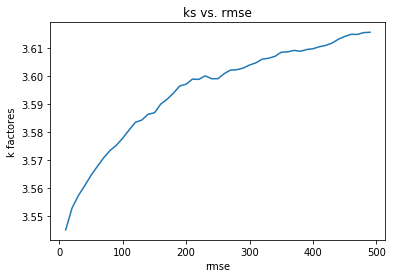

In [36]:
plt.plot(k,rms)
plt.title('ks vs. rmse')
plt.xlabel('rmse')
plt.ylabel('k factores')